                             Red Wine Quality Prediction Project

Problem statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine.physicochemical (inputs) and sensory (the output) variables are available.We have to  Use machine learning to determine which physiochemical properties make a wine 'good'!By analysing all inputs fixed acidity,	volatile acidity,	citric acid,	residual sugar,	chlorides,	free sulfur dioxide,	total sulfur dioxide,	density,	pH,	sulphates alcohol We have to predict the good quality wine

In [4]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
# load wine dataset 
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


 there are 11 input variables and one target variable quality.we have to determine the best quality wine

In [6]:
#determine the shape
print(df.shape)

(1599, 12)


There are 1599 rows and 12 columns in the given dataset

In [7]:
#load 15 rows
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [8]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [9]:
#columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
#columns in list format
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

FOR CHECKING NULL VALUES

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

By checking the given dataset there are no null values present.

In [12]:
#to get the information about the given data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


By analysing the given dataset there is one integer valueint64,and 11 float values including the target variable


<AxesSubplot:xlabel='quality', ylabel='count'>

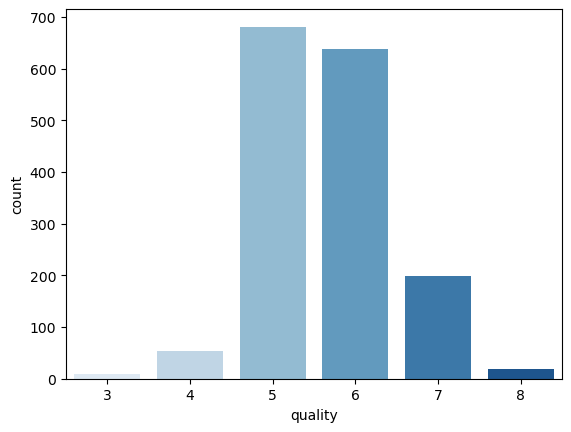

In [13]:
sns.countplot(df['quality'],palette='Blues')

The given count plot shows there are 6 quality values,the quality starts from 3 and its goes on like 4,5 6,7 and 8.Here quality value is less that means the wine quality is bad where as quality value is high,means wine quality is good.

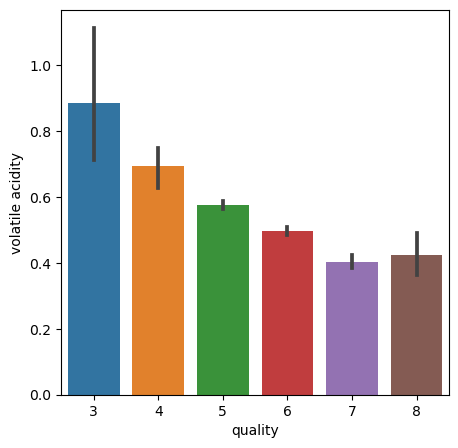

In [14]:
#volatile acidity vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=df)
plt.show()

By analysing the graph,its clear that when volatile acidity increases,quality of wine decreases
(volatile acidity inversly proportional to each other)hence volatile acidity not influencing the quality of wine.

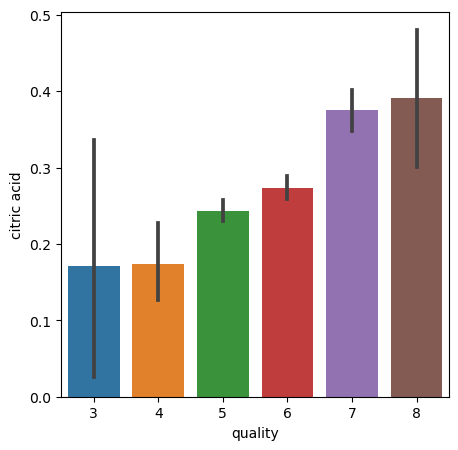

In [15]:
#citric acid and quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=df)
plt.show()

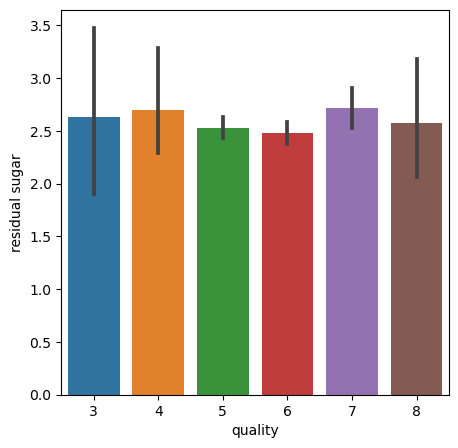

In [16]:
#residual sugar and quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data=df)
plt.show()

 here there is no specific pattern in the above plot

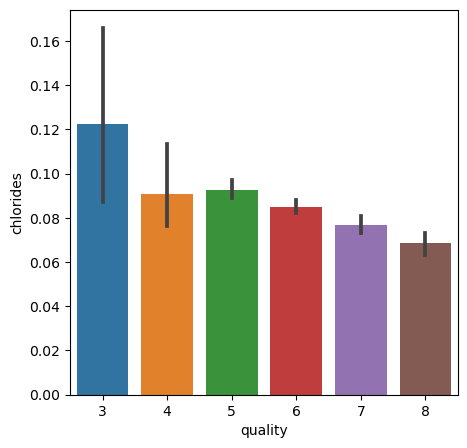

In [17]:
#chlorides and quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=df)
plt.show()

Here shows  downward trend

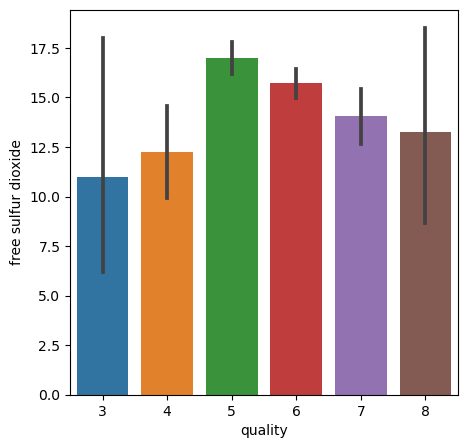

In [18]:
# free sulfur dioxide vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='free sulfur dioxide',data=df)
plt.show()

There is no specific pattern shows in the above plot.

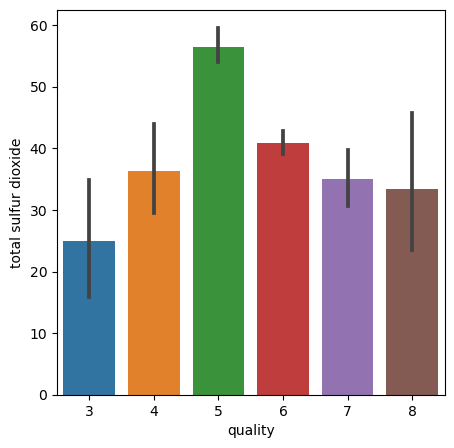

In [19]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='total sulfur dioxide',data=df)
plt.show()

There is no specific pattern shows in the above plot

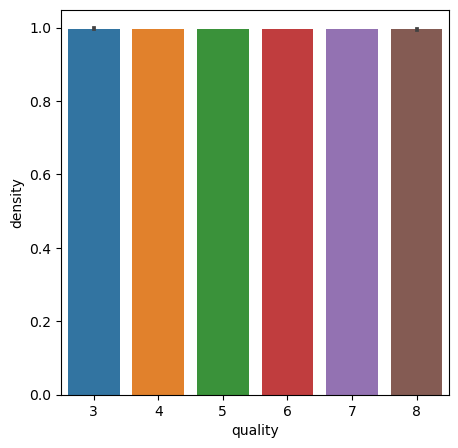

In [20]:
#density and quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='density',data=df)
plt.show()

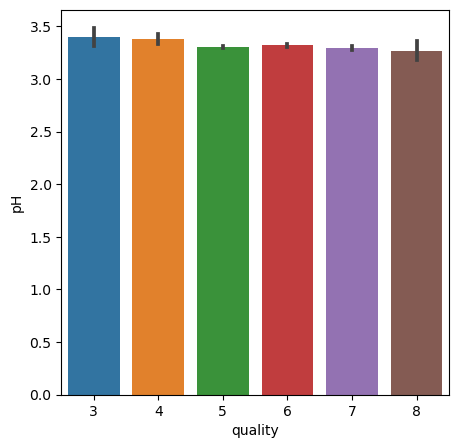

In [21]:
#ph vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='pH',data=df)
plt.show()

 shows slightly downward trend in the above plot

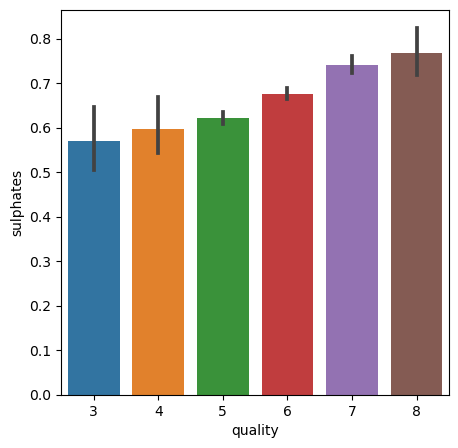

In [22]:
#quality vs sulphates
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='sulphates',data=df)
plt.show()

Above plot shows little bit of increasing trend(means amount of sulphate influence a little bit for predicting the quality of wine )

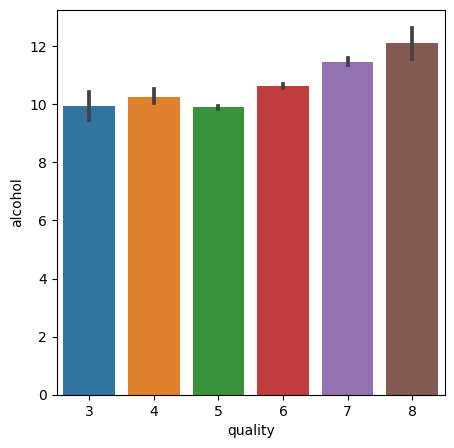

In [23]:
#quality vs alcohol
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=df)
plt.show()

   Above plot shows increasing trend

So here we can conclude that to get better quality wine citric acid, sulphates and alcohol columns play a major role.

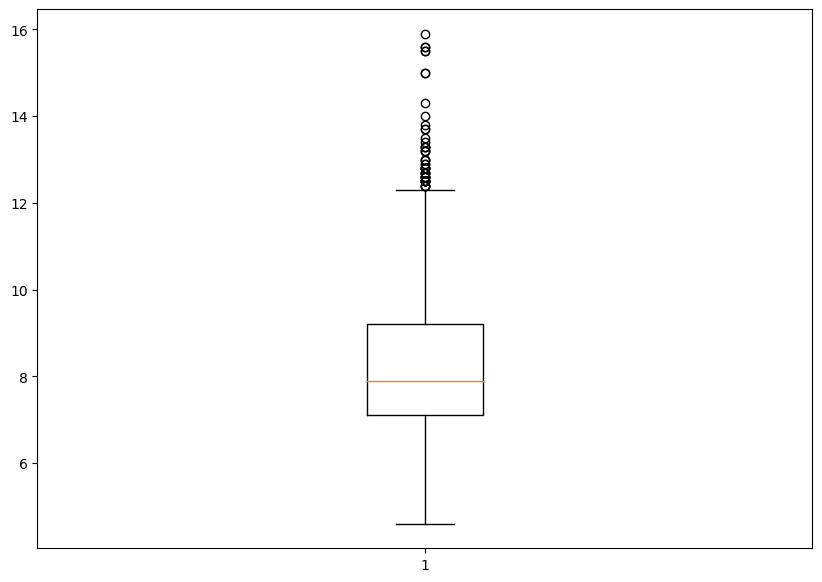

In [24]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['fixed acidity'])
plt.show()

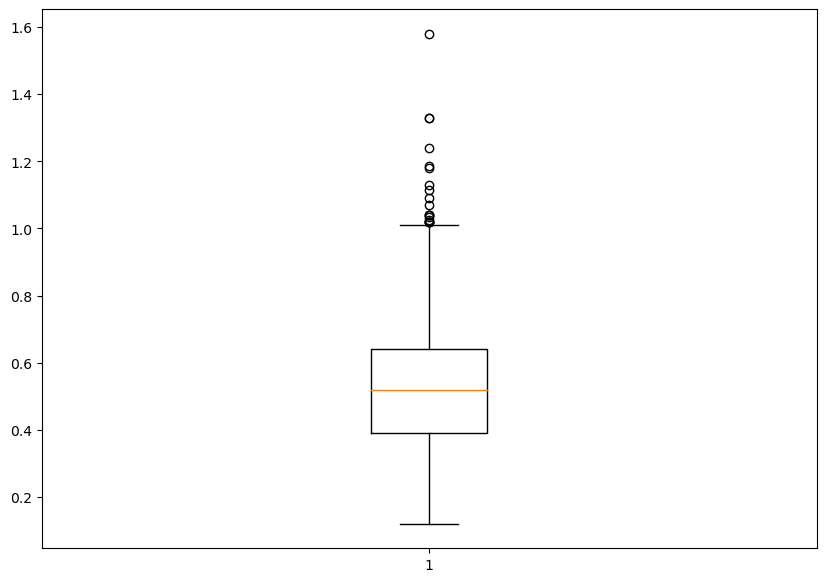

In [25]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['volatile acidity'])
plt.show()

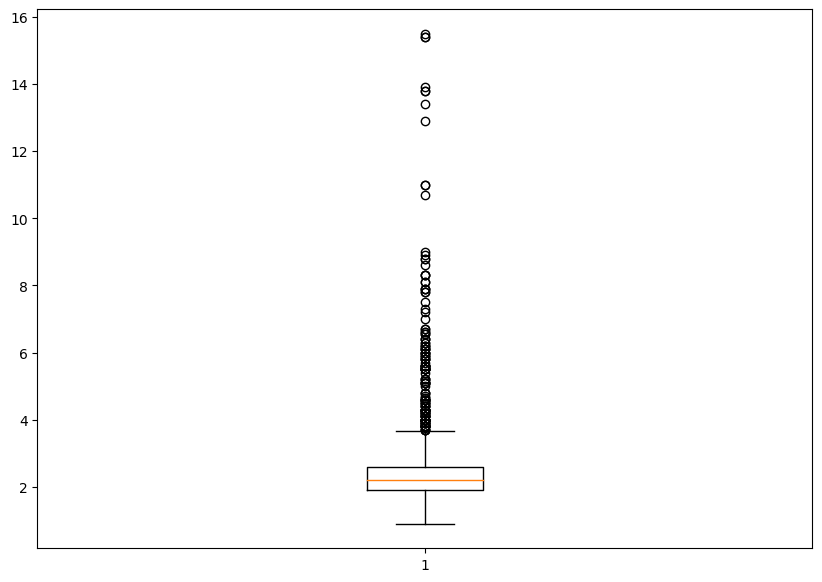

In [26]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['residual sugar'])
plt.show()

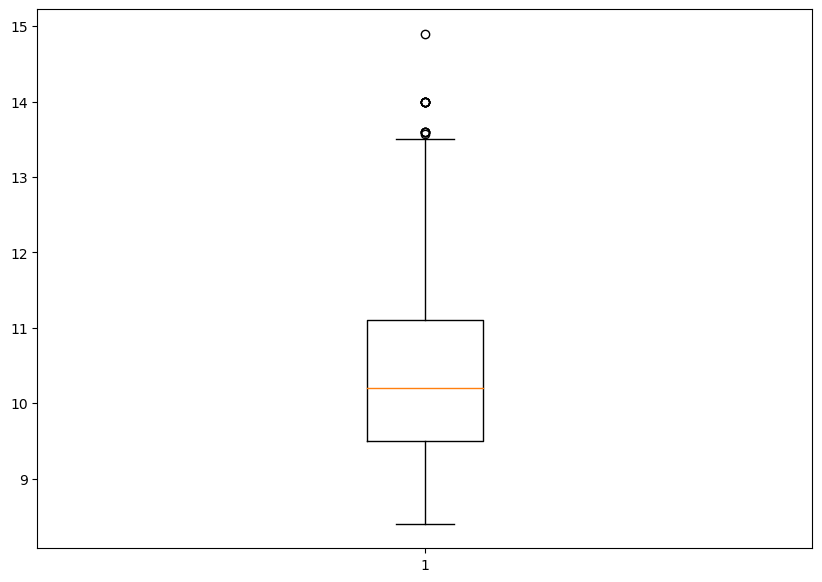

In [27]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['alcohol'])
plt.show()

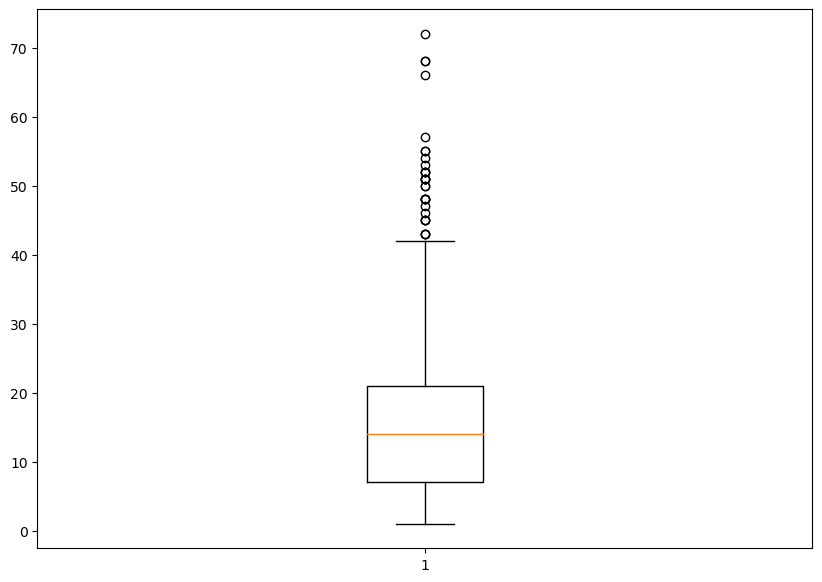

In [28]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['free sulfur dioxide'])
plt.show()

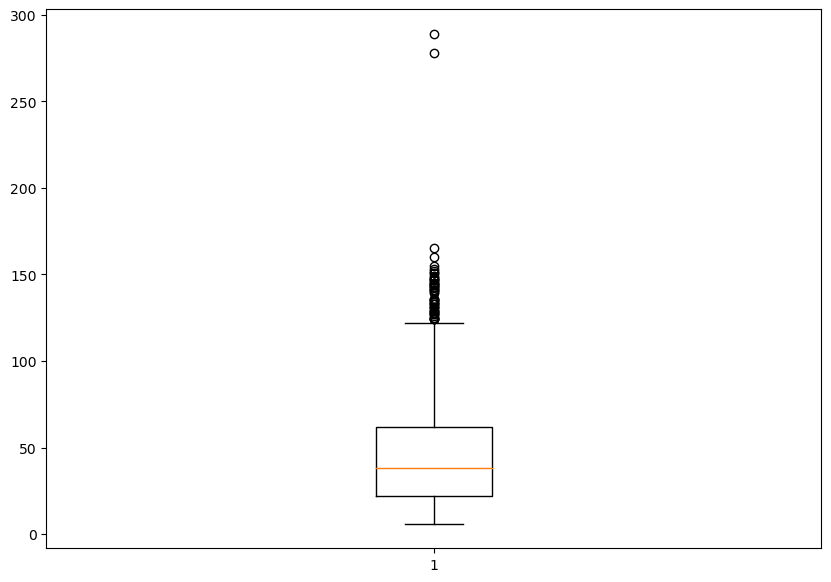

In [29]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['total sulfur dioxide'])
plt.show()

From the above boxplot we are able to see the outliers. we have to ignore the continous outlier sections
where as the outliers that are single values needs to be treated.lets perform another analysis using histograms to know much more better

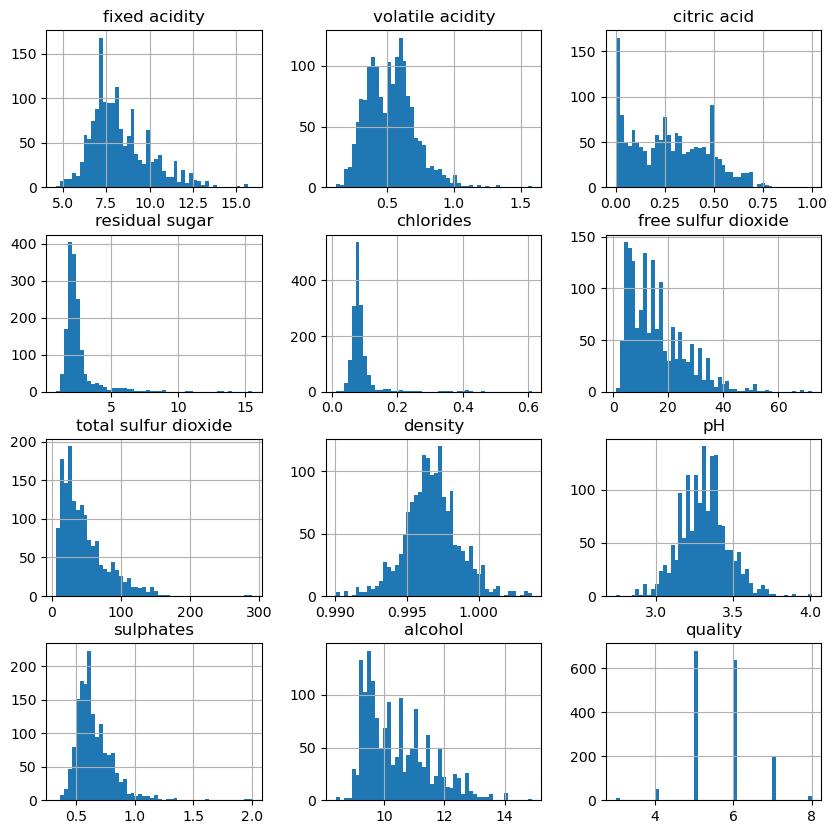

In [30]:
df.hist(figsize=(10,10),bins=50)
plt.show()

In [31]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


For understanding the corelation between the columns,here we use heatmap.positevly correlated means if one value increases the other value also
increases where as negatively correlted means one values increases other values is decrease in nature

<AxesSubplot:>

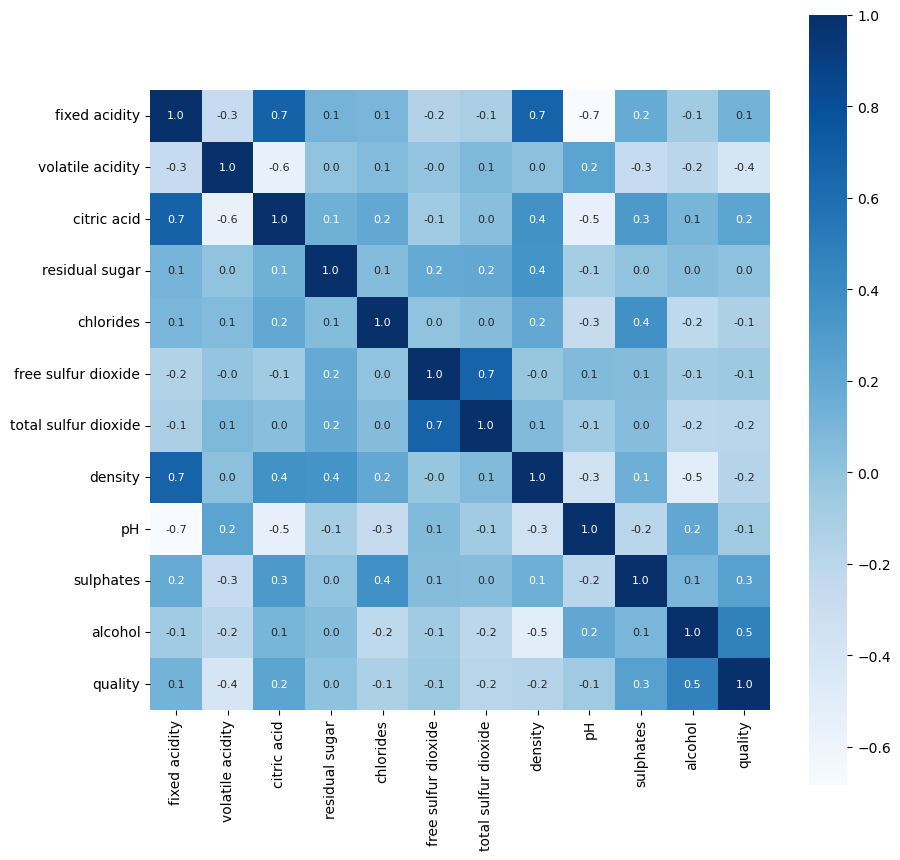

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

here in the heatmap,we can see  alcohol vs quality is positively corelated,volatile acidity is negatively corelated.from the above heatmap,we can understand alcohol influence more on quality prediction.so we have to focus more on alcohol,citric acid other than volatile acidity 

In [33]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

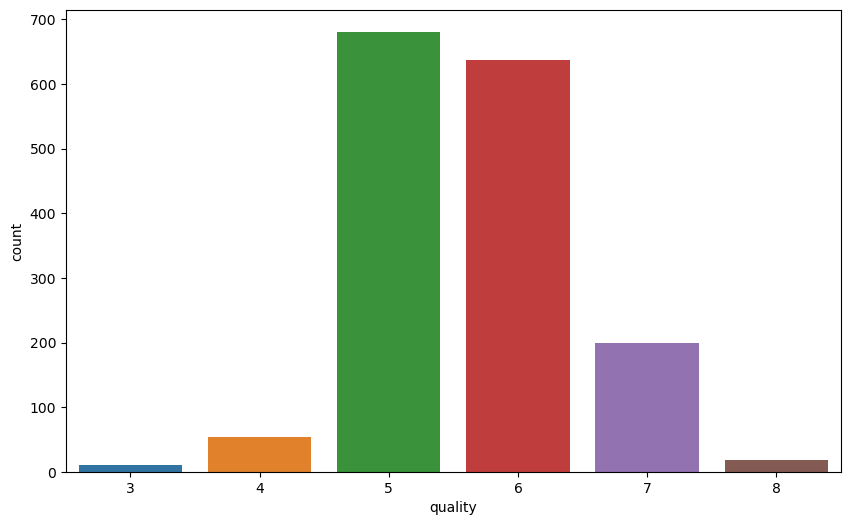

In [34]:
print(df['quality'].value_counts())
fig=plt.figure(figsize=(10,6))
sns.countplot(df['quality'])              

In [35]:
df['quality']=[1 if x >= 7 else 0 for x in df['quality']]

In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [37]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

0    1382
1     217
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

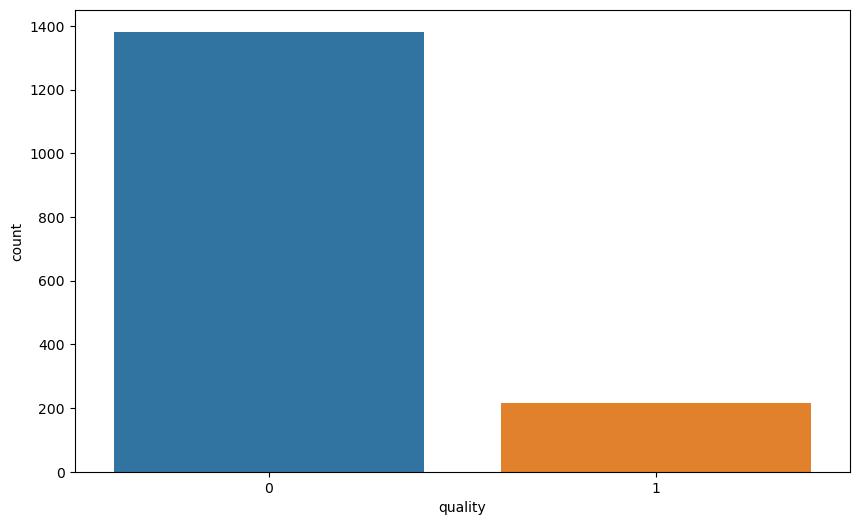

In [38]:
print(df['quality'].value_counts())
fig=plt.figure(figsize=(10,6))
sns.countplot(df['quality'])        

In [39]:
#to find the location of values
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [40]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [41]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print("accuracy :", model.score(X_test, Y_test)*100)

accuracy : 87.29166666666667


by using decision tree classifier,the accuracy rate is 87.5

In [44]:
#SVC 
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print("accuracy xTRAIN Y TRAIN :", model.score(X_train, Y_train))
print("accuracy XTEST YTEST :", model.score(X_test, Y_test))

accuracy xTRAIN Y TRAIN : 0.8641644325290437
accuracy XTEST YTEST : 0.86875


In [45]:
inputs = [7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]
pred = pd.DataFrame(inputs)
pred

,0
0,7.4000
1,0.7000
2,0.0000
3,1.9000
4,0.0760
5,11.0000
6,34.0000
7,0.9978
8,3.5100
9,0.5600


In [46]:
quality=pred.transpose()
test_pred=model.predict(quality)

In [54]:
if(test_pred<7):
    print("Wine Quality Is Good.")
else:
    print("Wine Quality Is Not Good.")    

Wine Quality Is Good.
